# Text Classification

Anda bekerja disebuah perusahaan yang membantu untuk memilah produk suatu e_commerce. Anda
diberikan data text deskripsi produk dari website e-commerce dengan 4 label, yaitu Household, Books,
Electronics dan Clothing & Accessories. Lakukan pemodelan klasifikasi dengan menggunakan data
tersebut, dengan ketentuan sebagai berikut:

## Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_1D.csv")
df

,Unnamed: 0,text,label
0,0,Tamron AF 70-300mm F/4.0-5.6 Di LD Macro Telep...,Electronics
1,1,Softline Butterfly Women's Cotton Camisole,Clothing & Accessories
2,2,Indian Economy: For UPSC Civil Services & Othe...,Books
3,3,Fujifilm X-T3 Mirrorless Digital Camera with X...,Electronics
4,4,"Barata Formal Ties For Men, Navy Blue Tie Form...",Clothing & Accessories
...,...,...,...
12601,12601,EK UDAAN Unisex Woolen Thermal Wear Thumb Sock...,Clothing & Accessories
12602,12602,Prime-Comfort (Blue and Yellow) Premium Foldab...,Household
12603,12603,The One-Straw Revolution: An Introduction to N...,Books
12604,12604,Peter Jones Full Rim Round Unisex Spectacle Fr...,Clothing & Accessories


### Drop Unused Column

Unnamed: 0 cuma berisi increment seperti index, jadi tidak akan dipakai

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,text,label
0,Tamron AF 70-300mm F/4.0-5.6 Di LD Macro Telep...,Electronics
1,Softline Butterfly Women's Cotton Camisole,Clothing & Accessories
2,Indian Economy: For UPSC Civil Services & Othe...,Books
3,Fujifilm X-T3 Mirrorless Digital Camera with X...,Electronics
4,"Barata Formal Ties For Men, Navy Blue Tie Form...",Clothing & Accessories
...,...,...
12601,EK UDAAN Unisex Woolen Thermal Wear Thumb Sock...,Clothing & Accessories
12602,Prime-Comfort (Blue and Yellow) Premium Foldab...,Household
12603,The One-Straw Revolution: An Introduction to N...,Books
12604,Peter Jones Full Rim Round Unisex Spectacle Fr...,Clothing & Accessories


### Check Missing Value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12606 entries, 0 to 12605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12606 non-null  object
 1   label   12606 non-null  object
dtypes: object(2)
memory usage: 197.1+ KB


### Drop Duplicated Data

In [6]:
df.duplicated().sum()

2152

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### EDA

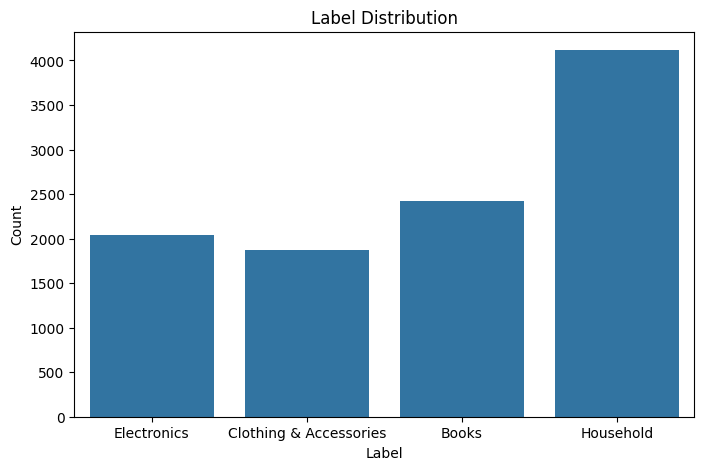

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Dari chart di atas, kita bisa tahu bahwa ketegori household lebih mendominasi dibandingkan dengan kategori-kategori lainnya. Namun, karena gapnya tidak terlalu besar, imbalance ini harusnya tidak akan terlalu memperngaruhi performa model karena kategori-kategori lainnya juga didukung oleh data yang cukup banyak.

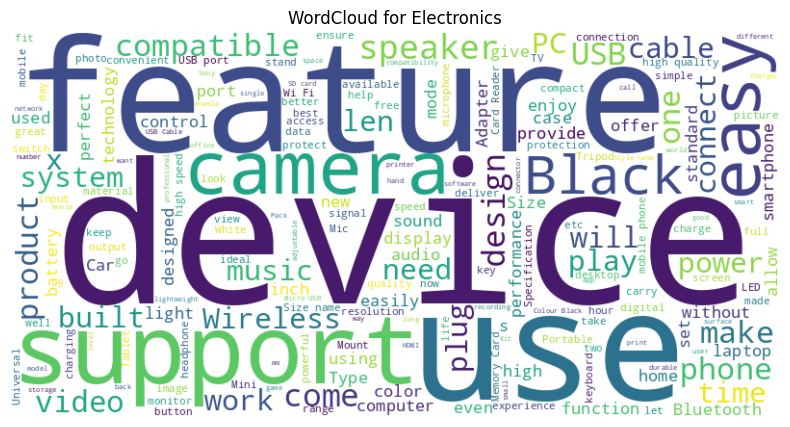

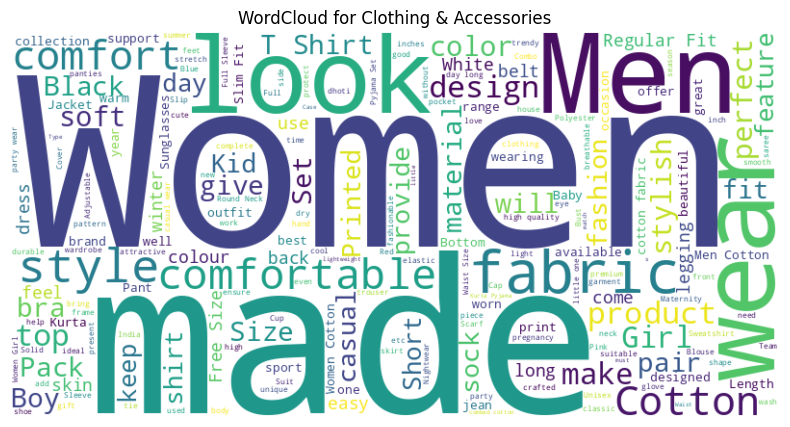

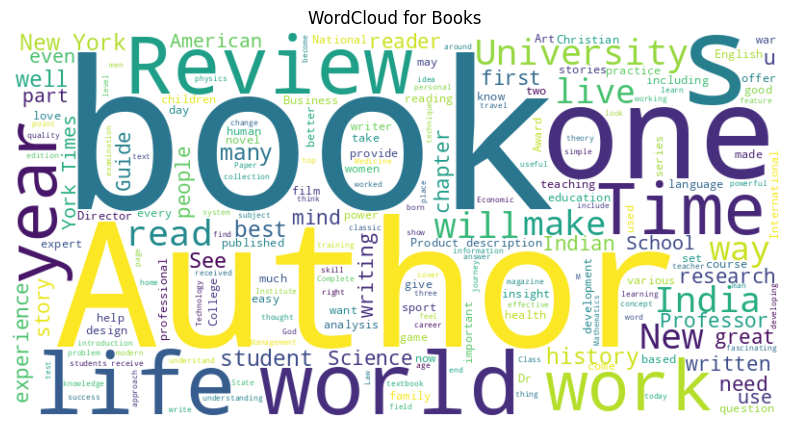

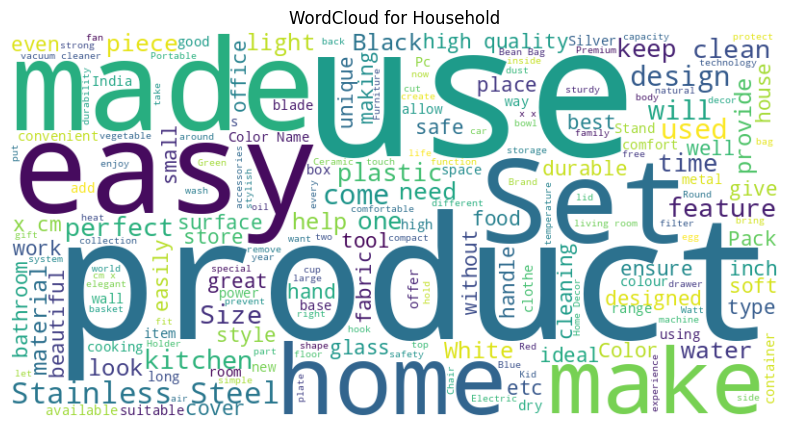

In [9]:
from wordcloud import WordCloud

labels = df['label'].unique()

# Wordcloud for every category
for label in labels:
    subset = df[df['label'] == label]
    text = " ".join(subset['text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {label}")
    plt.show()

    print()

Dalam kategori Electronics, word cloud menunjukkan dominasi kata-kata seperti "device," "feature," "support," dan "use," yang mencerminkan pentingnya fitur teknis dan aspek fungsional dari produk elektronik. Kata-kata teknis lain seperti "USB," "Bluetooth," "compatible," "wireless," dan "camera" menggambarkan elemen-elemen yang sering muncul terkait connectivity dan compatibility dari suatu perangkat. Selain itu, kata "easy" menandakan bahwa kemudahan dalam penggunaan adalah salah satu aspek utama yang digunakan untuk menarik konsumen dengan description. 

Di sisi lain, untuk kategori Clothing & Accessories, word cloud didominasi oleh kata-kata seperti "women," "wear," "look," "comfortable," dan "fabric," yang menunjukkan fokus pada kenyamanan, bahan, dan gaya. Adanya kata-kata seperti "cotton," "material," dan "fabric" juga mengindikasikan perhatian pada jenis bahan yang digunakan, sementara istilah seperti "style," "fashion," dan "fit" menyoroti pentingnya estetika dan kesesuaian ukuran dalam kategori ini. 

Dalam kategori Books, kata-kata yang dominan seperti "book," "author," "life," "world," "history," dan "review" mencerminkan tema yang kuat terkait literatur, penulisan, dan pandangan hidup. Kata-kata seperti "University," "Professor," dan "student" juga menunjukkan adanya konteks akademik, yang mungkin mengindikasikan bahwa beberapa buku dalam koleksi ini terkait dengan pendidikan atau bacaan yang mendalam untuk pembaca di lingkungan universitas atau sekolah. Secara keseluruhan, kategori ini mengarahkan pada marketing untuk minat pembaca yang ingin mengeksplorasi cerita, sejarah, dan ide-ide besar, terutama di kalangan pelajar atau akademisi.

Terakhir, pada kategori Household, kata-kata dominan seperti "product," "use," "home," "kitchen," "stainless steel," dan "plastic" menunjukkan fokus pada barang-barang rumah tangga yang praktis dan sering digunakan. Kata-kata seperti "easy," "clean," "quality," dan "design" mencerminkan marketing terhadap preferensi konsumen untuk produk yang berkualitas tinggi, mudah dibersihkan, dan memiliki desain yang nyaman dan tahan lama.

Semua kata yang sering muncul dalam wordcloud berkaitan dengan kategorinya masing-masing oleh karena itu, tidak diperlukan preprocessing yang terlalu rumit atau mendetail. Namun, mungkin harus dilakukan stemming atau lemmatization untuk menangani variasi kata seperti "comfortable" dan "comfort," atau "wear" dan "wearing," agar makna inti tetap terjaga dan tidak terjadi redundansi.

## Preprocessing
[LO1, LO2, LO3 – 10 Points] Lakukan proses pre-processing hingga anda mendapatkan set
token yang sudah berada dalam bentuk dasar sesuai standard tata bahasa

### Clean Text

In [10]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URL
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'@\w+|\#', '', text) # remove tag
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = ' '.join(text.split())

    return text

df['text'] = df['text'].apply(clean_text)

df.sample(5)

,text,label
1257,mee mee ultra thin super absorbent disposable ...,Clothing & Accessories
11649,and beyond,Books
6198,generic hex drive power drill socket extension...,Household
5092,buddhist logic and epistemology about the auth...,Books
3426,uniqual tweezer set of pcs curved point straig...,Household


### Tokenization

In [11]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
from nltk.tokenize import word_tokenize

df['token'] = df['text'].apply(word_tokenize)
df.sample(5)

,text,label,token
3245,aerograph airbrush mini air compressor profess...,Electronics,"[aerograph, airbrush, mini, air, compressor, p..."
3265,deckup engineered wood matte finish uniti door...,Household,"[deckup, engineered, wood, matte, finish, unit..."
260,ansio vacuum compressed pp space saver storage...,Household,"[ansio, vacuum, compressed, pp, space, saver, ..."
5356,superior men s cotton full bathrobe black cove...,Household,"[superior, men, s, cotton, full, bathrobe, bla..."
4283,bold n elegant women s faux rabbit hair fur an...,Clothing & Accessories,"[bold, n, elegant, women, s, faux, rabbit, hai..."


### Remove Stop Words

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['token'] = df['token'].apply(remove_stopwords)
df.sample(5)

,text,label,token
8416,aditii s mantra stylish blue white off shoulde...,Clothing & Accessories,"[aditii, mantra, stylish, blue, white, shoulde..."
6414,lee cooper girls cotton shorts girls shorts be...,Clothing & Accessories,"[lee, cooper, girls, cotton, shorts, girls, sh..."
7250,ahhaaaa boy s cotton kurta and pants with wais...,Clothing & Accessories,"[ahhaaaa, boy, cotton, kurta, pants, waistcoat..."
11613,periodontics revisited about the author shalu ...,Books,"[periodontics, revisited, author, shalu, bathl..."
1554,inch pine tree curtain swags curtain swags mea...,Household,"[inch, pine, tree, curtain, swags, curtain, sw..."


### Lematization

Untuk menangani variasi kata seperti "comfortable" dan "comfort," atau "wear" dan "wearing," agar makna inti tetap terjaga dan tidak terjadi redundansi.

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized

df['lemmatized'] = df['token'].apply(lemmatize_text)
df.sample(5)

,text,label,token,lemmatized
1916,arificial grass for floor soft and durable pla...,Household,"[arificial, grass, floor, soft, durable, plast...","[arificial, grass, floor, soft, durable, plast..."
12556,things i learned in urban design school review...,Books,"[things, learned, urban, design, school, revie...","[thing, learned, urban, design, school, review..."
9735,devil women s girl s army comfort capri women ...,Clothing & Accessories,"[devil, women, girl, army, comfort, capri, wom...","[devil, woman, girl, army, comfort, capri, wom..."
3163,amicikart digital touch screen weather station...,Household,"[amicikart, digital, touch, screen, weather, s...","[amicikart, digital, touch, screen, weather, s..."
10166,mamma s maternity strip solid maternity dress ...,Clothing & Accessories,"[mamma, maternity, strip, solid, maternity, dr...","[mamma, maternity, strip, solid, maternity, dr..."


### Split Data

token di join lagi agar dapat dimasukkan ke bag of words vectorizer

In [17]:
df['preprocessed_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
df.sample(5)

,text,label,token,lemmatized,preprocessed_text
4555,museum of bad art art too bad to be ignored ca...,Books,"[museum, bad, art, art, bad, ignored, calendar]","[museum, bad, art, art, bad, ignored, calendar]",museum bad art art bad ignored calendar
9309,shabana art potteries decorative terracotta fl...,Household,"[shabana, art, potteries, decorative, terracot...","[shabana, art, pottery, decorative, terracotta...",shabana art pottery decorative terracotta flow...
11944,allextreme cleaning brush with hard long brist...,Household,"[allextreme, cleaning, brush, hard, long, bris...","[allextreme, cleaning, brush, hard, long, bris...",allextreme cleaning brush hard long bristle ca...
3296,lovable women s cotton brief pack of colors ma...,Clothing & Accessories,"[lovable, women, cotton, brief, pack, colors, ...","[lovable, woman, cotton, brief, pack, color, m...",lovable woman cotton brief pack color may vary...
6606,idg square ss brass long body bib cock tap chr...,Household,"[idg, square, ss, brass, long, body, bib, cock...","[idg, square, s, brass, long, body, bib, cock,...",idg square s brass long body bib cock tap chro...


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8363,) (8363,)
(2091,) (2091,)


### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)

label_mapping = {label: index for index, label in enumerate(LE.classes_)}
label_mapping

{'Books': 0, 'Clothing & Accessories': 1, 'Electronics': 2, 'Household': 3}

## Modelling
[LO1, LO2, LO3, LO4 – 20 Points] Melakukan pemodelan klasifikasi dengan menggunakan
2 metode Machine Lerning yaitu SVM dan Random Forest; dan 2 metode text representation
(vectorization), anda perlu melakukan tuning hyperparameter minimal 2 hyperparameter
untuk masing-masing algoritma machine learning.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### Vectorization

Disini saya menggunakan jenis bag of words vectorizer seperti TF-IDF dan count vectorizer karena tasknya yang hanya text classification sehingga tidak terlalu mementingkan konteks disekitar kata-kata yang ada. Selain itu, performa model yang dihasilkan sendiri sudah cukup baik.

In [21]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

count = CountVectorizer()
x_train_count = count.fit_transform(x_train)
x_test_count = count.transform(x_test)

In [22]:
x_test_tfidf

<2091x33326 sparse matrix of type '<class 'numpy.float64'>'
	with 104171 stored elements in Compressed Sparse Row format>

In [23]:
x_test_count

<2091x33326 sparse matrix of type '<class 'numpy.int64'>'
	with 104171 stored elements in Compressed Sparse Row format>

### Models

#### SVM TF-IDF

In [25]:
svm = SVC()
svm.fit(x_train_tfidf, y_train)
y_pred = svm.predict(x_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       488
           1       0.97      0.95      0.96       389
           2       0.96      0.93      0.94       391
           3       0.93      0.97      0.95       823

    accuracy                           0.95      2091
   macro avg       0.96      0.95      0.95      2091
weighted avg       0.95      0.95      0.95      2091



#### Random Forest TF-IDF

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
y_pred = rf.predict(x_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       488
           1       0.95      0.93      0.94       389
           2       0.96      0.87      0.91       391
           3       0.90      0.96      0.93       823

    accuracy                           0.93      2091
   macro avg       0.94      0.92      0.93      2091
weighted avg       0.93      0.93      0.93      2091



#### SVM Count

In [27]:
svm = SVC()
svm.fit(x_train_count, y_train)
y_pred = svm.predict(x_test_count)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       488
           1       0.95      0.87      0.91       389
           2       0.94      0.86      0.90       391
           3       0.91      0.92      0.92       823

    accuracy                           0.90      2091
   macro avg       0.91      0.90      0.90      2091
weighted avg       0.91      0.90      0.90      2091



#### Random Forest Count

In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_count, y_train)
y_pred = rf.predict(x_test_count)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       488
           1       0.95      0.93      0.94       389
           2       0.95      0.86      0.90       391
           3       0.90      0.96      0.93       823

    accuracy                           0.93      2091
   macro avg       0.93      0.92      0.93      2091
weighted avg       0.93      0.93      0.93      2091



Dari 2 base model dengan jenis vectorization yang berbeda, best modelnya adalah SVM dengan vectorization TF-IDF. Gap performancenya juga cukup jauh jika dibandingkan dengan count vectorizer. Sedangkan, untuk Random Forest, gap performance antara TF-IDF dan count tidak terlalu jauh namun, kita bisa melihat bahwa Random Forest dengan TF-IDF memiliki performa yang sedikit lebih baik.

### Grid Search

#### SVM TF-IDF

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9533664419702736


In [27]:
best_model_svc = grid_search.best_estimator_
y_pred = best_model_svc.predict(x_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       488
           1       0.97      0.96      0.97       389
           2       0.95      0.94      0.94       391
           3       0.95      0.97      0.96       823

    accuracy                           0.96      2091
   macro avg       0.96      0.95      0.96      2091
weighted avg       0.96      0.96      0.96      2091



#### SVM Count

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_count, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9226348249856287


In [35]:
best_model_svc = grid_search.best_estimator_
y_pred = best_model_svc.predict(x_test_count)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       488
           1       0.95      0.94      0.94       389
           2       0.92      0.92      0.92       391
           3       0.94      0.93      0.94       823

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091



#### Random Forest TF-IDF

In [30]:
rf_param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 400}
Best Score: 0.9197659420517821


In [31]:
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(x_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       488
           1       0.95      0.93      0.94       389
           2       0.95      0.88      0.91       391
           3       0.90      0.96      0.93       823

    accuracy                           0.93      2091
   macro avg       0.94      0.92      0.93      2091
weighted avg       0.93      0.93      0.93      2091



#### Random Forest Count

In [32]:
rf_param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_count, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 400}
Best Score: 0.9204831449105837


In [33]:
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(x_test_count)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       488
           1       0.95      0.94      0.94       389
           2       0.95      0.88      0.92       391
           3       0.91      0.96      0.93       823

    accuracy                           0.93      2091
   macro avg       0.94      0.92      0.93      2091
weighted avg       0.93      0.93      0.93      2091



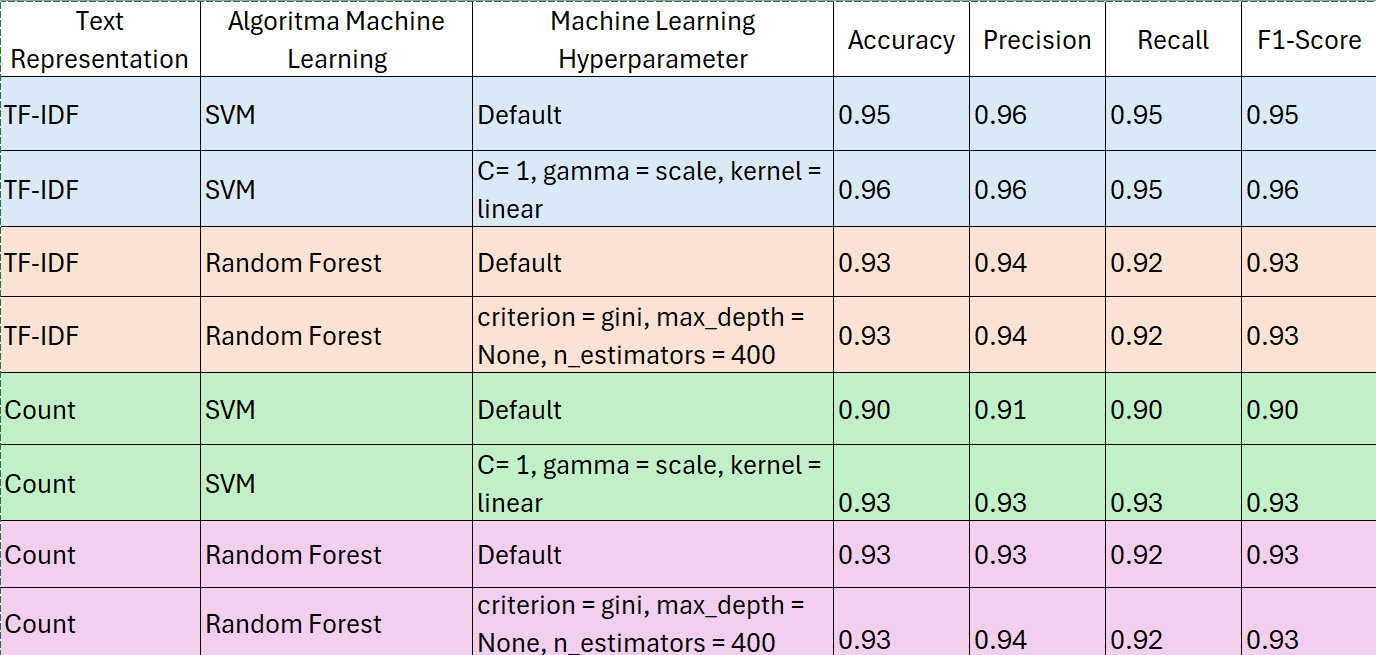


Setelah dilakukan hyperparameter tuning dengan grid search, SVM model dengan TF-IDF vectorization dan tuning hyperparameter berupa C=1, gamma=scale, kernel=linear adalah best modelnya. Model tersebut mencapai akurasi dan F1-score tertinggi, yaitu 0,96, yang melebihi performa semua model lain dalam setiap metrik. Pada model SVM dengan representasi TF-IDF tanpa tuning, akurasi dan F1-score berada di 0,95, namun meningkat menjadi 0,96 setelah dilakukan tuning. Memang bukan merupakan peningkatan signifikan, namun hal tersebut menunjukkan kontribusi positif dari tuning hyperparameter. Sedangkan, SVM model dengan count vectorizer memang mendapatkan boost dari segi performancenya setelah hyperparameter tuning namun, hasilnya masih tidak sebagus SVM model dengan TF-IDF vectorization. Di sisi lain, model Random Forest dengan vectorization TF-IDF maupun Count Vectorizer, baik dengan atau tanpa tuning, mencapai akurasi dan F1-score maksimum di angka 0,93. Yang mana menunjukkan bahwa model tersebut tidak mendapat peningkatan signifikan dari vectorization atau tuning hyperparameter yang diuji. 